### WhiteNoise-Core Stochastic Evaluation

WhiteNoise-Core has implemented latest research in the space of differential privacy to provide commonly used aggregates like mean, variance, moment, covariance and also come up with ways to solve the issue of bias in reporting these differentially private aggregates. This notebook uses the stochastic evaluator to see if the new algorithms pass the privacy and bias tests. 

### Loading the library

In [1]:
import sys
import os
sys.path.append(os.path.join(os.path.abspath(''), '../sdk'))
import subprocess
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from opendp.whitenoise.evaluation.dp_verification import DPVerification
import opendp.whitenoise.evaluation.aggregation as agg
import opendp.whitenoise.evaluation.exploration as exp
import copy
import whitenoise
import whitenoise.components as op

from opendp.whitenoise.metadata.collection import *
from scipy import stats

### Loading the PUMS dataset

In [7]:
# Yarrow Test
dv = DPVerification(dataset_size=1000)
root_url = subprocess.check_output("git rev-parse --show-toplevel".split(" ")).decode("utf-8").strip()
test_csv_path = os.path.join(root_url, "service", "datasets", "evaluation", "PUMS_1000.csv")
test_csv_names = ["age", "sex", "educ", "race", "income", "married"]

df = pd.read_csv(test_csv_path)
actual_mean = df['race'].mean()
actual_var = df['educ'].var()
actual_moment = df['race'].skew()
actual_covariance = df['age'].cov(df['married'])
print(actual_mean, actual_var, actual_moment, actual_covariance)

Loaded 1000 records
1.954 11.665121121121123 0.7217152750192972 1.732179179179179


### MEAN

Length of D1:  1000  Length of D2:  999
DP Predicate Test: True 

Mean signed deviation ratio to actual:  0.0004994898409266797
p-Value of 1 sample t-test:  0.8802346360748743
Bias Test: False 



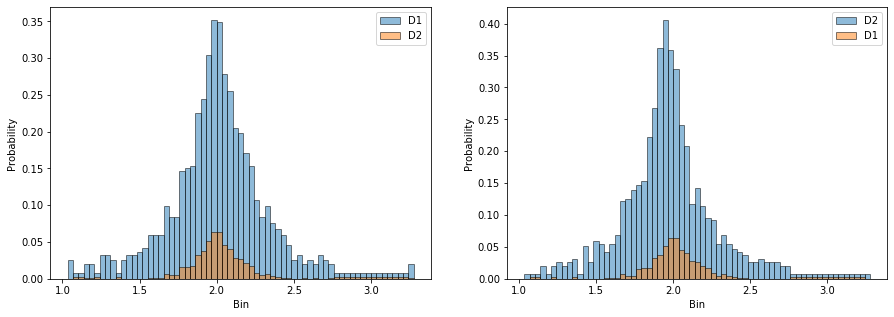

In [4]:
dp_yarrow_mean_res, bias_mean_res = dv.yarrow_test(test_csv_path, 
                                                   test_csv_names, 
                                                   op.dp_mean, 
                                                   'race', 
                                                   "FLOAT", 
                                                   repeat_count=1000,
                                                   epsilon=.65, 
                                                   actual = actual_mean, 
                                                   data_min=0., 
                                                   data_max=100., 
                                                   data_n=1000)

### VARIANCE

Length of D1:  1000  Length of D2:  999
DP Predicate Test: True 

Mean signed deviation ratio to actual:  -0.23031812629896045
p-Value of 1 sample t-test:  0.0
Bias Test: True 



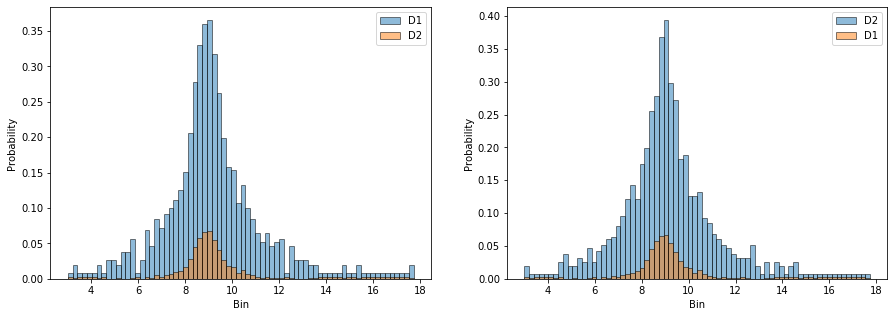

In [6]:
dp_yarrow_var_res, bias_var_res = dv.yarrow_test(test_csv_path, 
                                                 test_csv_names, 
                                                 op.dp_variance, 
                                                 'educ', 
                                                 "FLOAT", 
                                                 repeat_count=1000,
                                                 epsilon=.15, 
                                                 actual = actual_var, 
                                                 data_min=0., 
                                                 data_max=12., 
                                                 data_n=1000)

### MOMENT

Length of D1:  1000  Length of D2:  999
DP Predicate Test: True 

Mean signed deviation ratio to actual:  68.46947070899597
p-Value of 1 sample t-test:  0.8695931993276447
Bias Test: False 



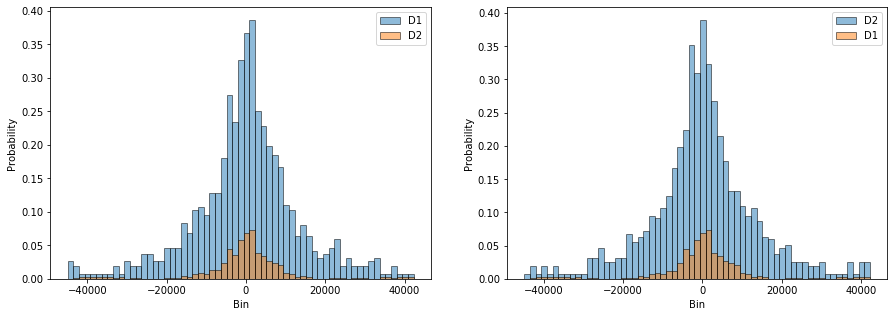

In [8]:
dp_yarrow_moment_res, bias_moment_res = dv.yarrow_test(test_csv_path, 
                                                       test_csv_names, 
                                                       op.dp_moment_raw, 
                                                       'race', 
                                                       "FLOAT", 
                                                       repeat_count=1000,
                                                       epsilon=.15, 
                                                       actual = actual_moment, 
                                                       data_min=0., 
                                                       data_max=100., 
                                                       data_n=1000, 
                                                       order = 3)

### COVARIANCE

Length of D1:  1000  Length of D2:  999
DP Predicate Test: True 

Mean signed deviation ratio to actual:  -0.9996442223004008
p-Value of 1 sample t-test:  0.0
Bias Test: True 



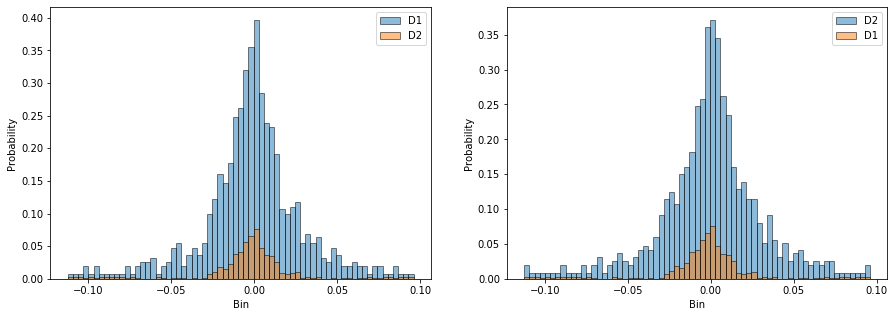

In [10]:
dp_yarrow_covariance_res, bias_cov_res = dv.yarrow_test(test_csv_path, 
                                                        test_csv_names, 
                                                        op.dp_covariance, 
                                                        'age', 
                                                        'married', 
                                                        "FLOAT", 
                                                        repeat_count=1000,
                                                        actual = actual_covariance, 
                                                        epsilon=.15, 
                                                        left_n=1000, 
                                                        right_n=1000,
                                                        left_min=0.,
                                                        left_max=1.,
                                                        right_min=0.,
                                                        right_max=1.)